# AI Project: Neural Network



---

In [1]:
# Libraries
import matplotlib
import numpy as np
import pandas as pd
from itertools import product
from ucimlrepo import fetch_ucirepo
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Modules
from ai_nn_project.utils.tuning import grid_search_knn, grid_search_mlp, parallel_grid_search_knn, parallel_grid_search_mlp
from ai_nn_project.models.neigbours.knn import KNN
from ai_nn_project.utils.visualisation import visualize_weights
from ai_nn_project.utils.activations import Sigmoid, ReLU, Linear
from ai_nn_project.models.neuronal_network.multilayer_perceptron import MLP
from ai_nn_project.utils.evaluations import accuracy, precision, recall, f1_score, mse_loss, mae_loss, rmse_loss, mape_loss, r2_score


# make figures appear inline
matplotlib.rcParams['figure.figsize'] = (15, 8)
%matplotlib inline

# notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

---

## Introduction

## Data Preprocessing

### Mushroom Dataset: Classification

In [2]:
# fetch dataset

# Mushroom. (1987). UCI Machine Learning Repository. https://doi.org/10.24432/C5959T.
mushroom = fetch_ucirepo(id=73) 

In [3]:
# pandas dataframe
mushroom_X = mushroom.data.features
mushroom_y = mushroom.data.targets

In [4]:
mushroom_X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [5]:
mushroom_y.head()

,poisonous
0,p
1,e
2,e
3,p
4,e


In [6]:
# Encode categorical features as a one-hot numeric array: Gives a unique number to each category
le = LabelEncoder()

mushroom_X_encoded = mushroom_X.apply(le.fit_transform).to_numpy()
mushroom_y_encoded = mushroom_y.apply(le.fit_transform).to_numpy()

mushroom_X_train, mushroom_X_test, mushroom_y_train, mushroom_y_test = train_test_split(mushroom_X_encoded, mushroom_y_encoded, test_size=0.2, random_state=42)

### Wine Dataset: Regression

In [7]:
# Cortez,Paulo, Cerdeira,A., Almeida,F., Matos,T., and Reis,J.. (2009). Wine Quality. UCI Machine Learning Repository. https://doi.org/10.24432/C56S3T.
wine_quality = fetch_ucirepo(id=186)

In [8]:
wine_X = wine_quality.data.features
wine_y = wine_quality.data.targets

In [9]:
wine_X.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [10]:
wine_y.head()

,quality
0,5
1,5
2,5
3,6
4,5


In [11]:
scaler = StandardScaler()
wine_X_scaled = scaler.fit_transform(wine_X)
wine_y_scaled = wine_y.to_numpy()

wine_X_train, wine_X_test, wine_y_train, wine_y_test = train_test_split(wine_X_scaled, wine_y_scaled, test_size=0.2, random_state=42)

## Baseline K-Nearest Neighbors: Classification

In [12]:
knn = KNN(k=20)
knn.fit(mushroom_X_train, mushroom_y_train)
mushroom_output = knn.predict(mushroom_X_test)

In [13]:
mushroom_output = mushroom_output.reshape(-1, 1)

print("Accuracy: ", accuracy(mushroom_y_test, mushroom_output))
print("Precision: ", precision(mushroom_y_test, mushroom_output))
print("Recall: ", recall(mushroom_y_test, mushroom_output))
print("F1-Score: ", f1_score(mushroom_y_test, mushroom_output))

Accuracy:  0.9950769230769231
Precision:  0.9961538461538462
Recall:  0.9936061381074168
F1-Score:  0.9948783610755442


## Multi-Layer Perceptron: Classification

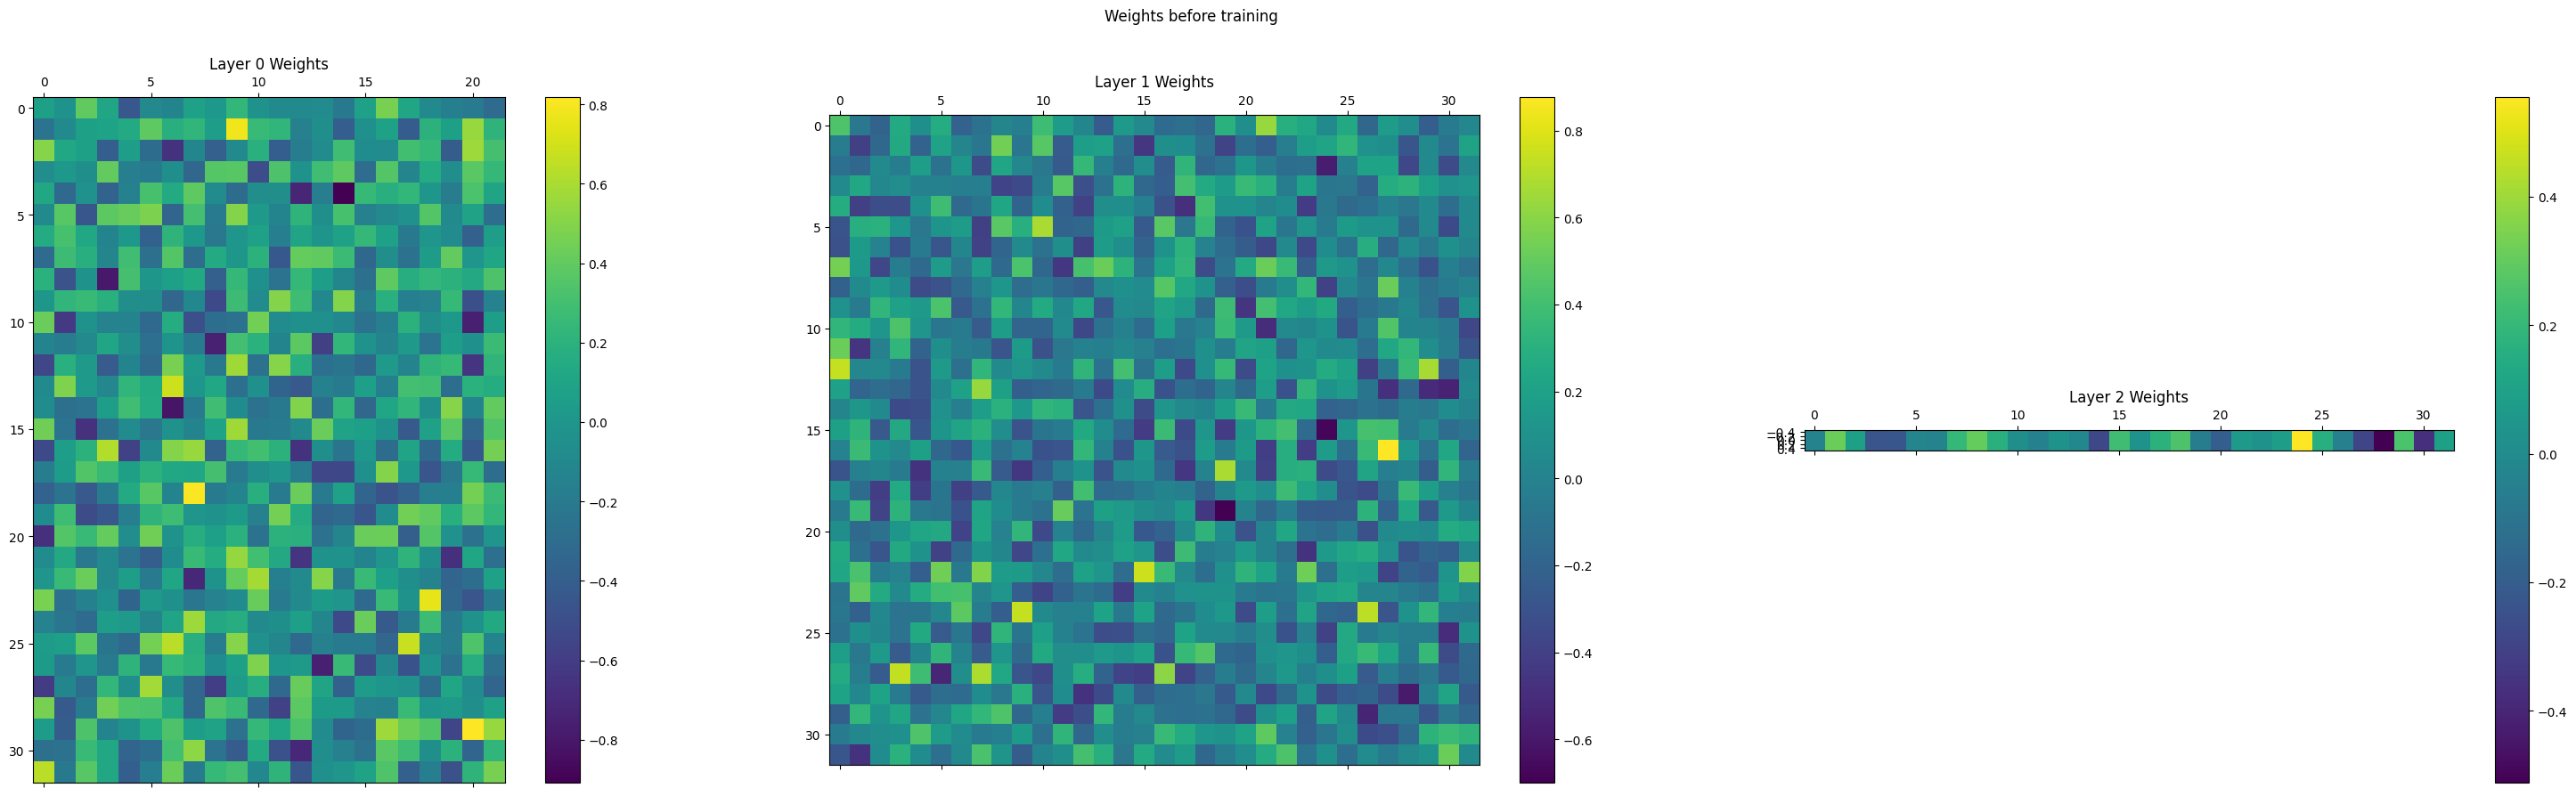

Training Progress:   0%|          | 0/32 [00:00<?, ?it/s]

Epoch 1/32 - {'mse_loss': 0.3260773568426241}
Epoch 2/32 - {'mse_loss': 0.3092627069236402}
Epoch 3/32 - {'mse_loss': 0.3004425884946372}
Epoch 4/32 - {'mse_loss': 0.2957643431543302}
Epoch 5/32 - {'mse_loss': 0.2926764494266283}
Epoch 6/32 - {'mse_loss': 0.2921664711737901}
Epoch 7/32 - {'mse_loss': 0.2904252208846724}
Epoch 8/32 - {'mse_loss': 0.28825394216580214}
Epoch 9/32 - {'mse_loss': 0.2894585464579883}
Epoch 10/32 - {'mse_loss': 0.2884544482545606}
Epoch 11/32 - {'mse_loss': 0.29053854330727513}
Epoch 12/32 - {'mse_loss': 0.2894165556610984}
Epoch 13/32 - {'mse_loss': 0.29090376255327755}
Epoch 14/32 - {'mse_loss': 0.2896299526967919}
Epoch 15/32 - {'mse_loss': 0.29106890603485697}
Epoch 16/32 - {'mse_loss': 0.2901600859155124}
Epoch 17/32 - {'mse_loss': 0.2918621887021532}
Epoch 18/32 - {'mse_loss': 0.2937972973496777}
Epoch 19/32 - {'mse_loss': 0.29520037211531336}
Epoch 20/32 - {'mse_loss': 0.29499755530370114}
Epoch 21/32 - {'mse_loss': 0.2973584013249843}
Epoch 22/32 - {'

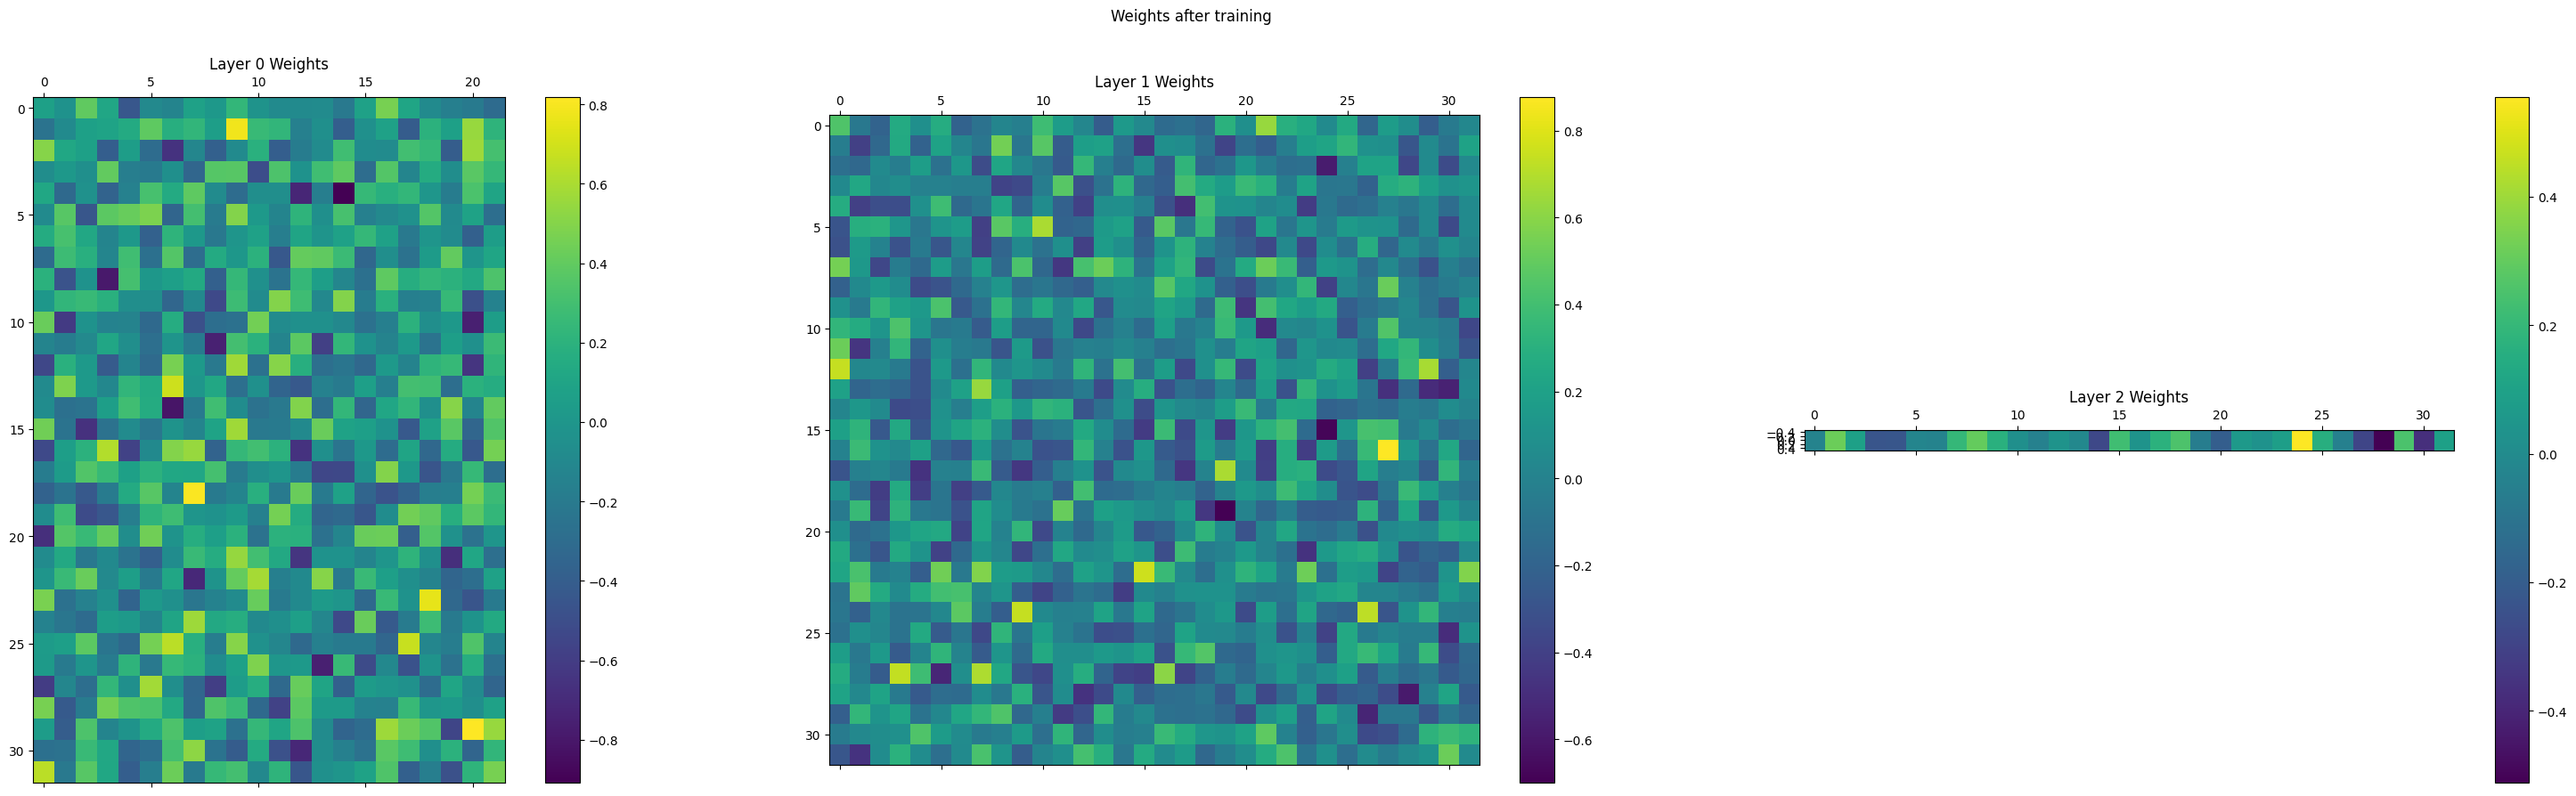

In [14]:
layer_sizes = [mushroom_X_train.shape[1], 32, 32, 1]
activations = [ReLU()] * (len(layer_sizes) - 2) + [Sigmoid()]

mushroom_network = MLP(layer_sizes, activations, learning_rate=0.1, epochs=32, batch_size=12)

visualize_weights(mushroom_network, title="Weights before training")

metrics = mushroom_network.fit(mushroom_X_train, mushroom_y_train, verbose=True)

visualize_weights(mushroom_network, title="Weights after training")

In [15]:
mushroom_output = mushroom_network.predict(mushroom_X_test.T)

# convert to binary
mushroom_output = np.where(mushroom_output >= 0.5, 1, 0)

print("Accuracy: ", accuracy(mushroom_y_test, mushroom_output.T))
print("Precision: ", precision(mushroom_y_test, mushroom_output.T))
print("Recall: ", recall(mushroom_y_test, mushroom_output.T))
print("F1-Score: ", f1_score(mushroom_y_test, mushroom_output.T))

Accuracy:  0.7864615384615384
Precision:  0.7967257844474761
Recall:  0.7468030690537084
F1-Score:  0.7709570957095708


## Baseline K-Nearest Neighbors: Regression

In [16]:
knn = KNN(k=20, mode="regression")
knn.fit(wine_X_train, wine_y_train)
wine_output = knn.predict(wine_X_test) 

In [17]:
wine_output = np.round(wine_output).reshape(-1, 1)

print("Accuracy: ", accuracy(wine_y_test, wine_output))
print("MSE: ", mse_loss(wine_y_test, wine_output))

Accuracy:  0.546923076923077
MSE:  0.5907692307692308


## Multi-Layer Perceptron: Reggression

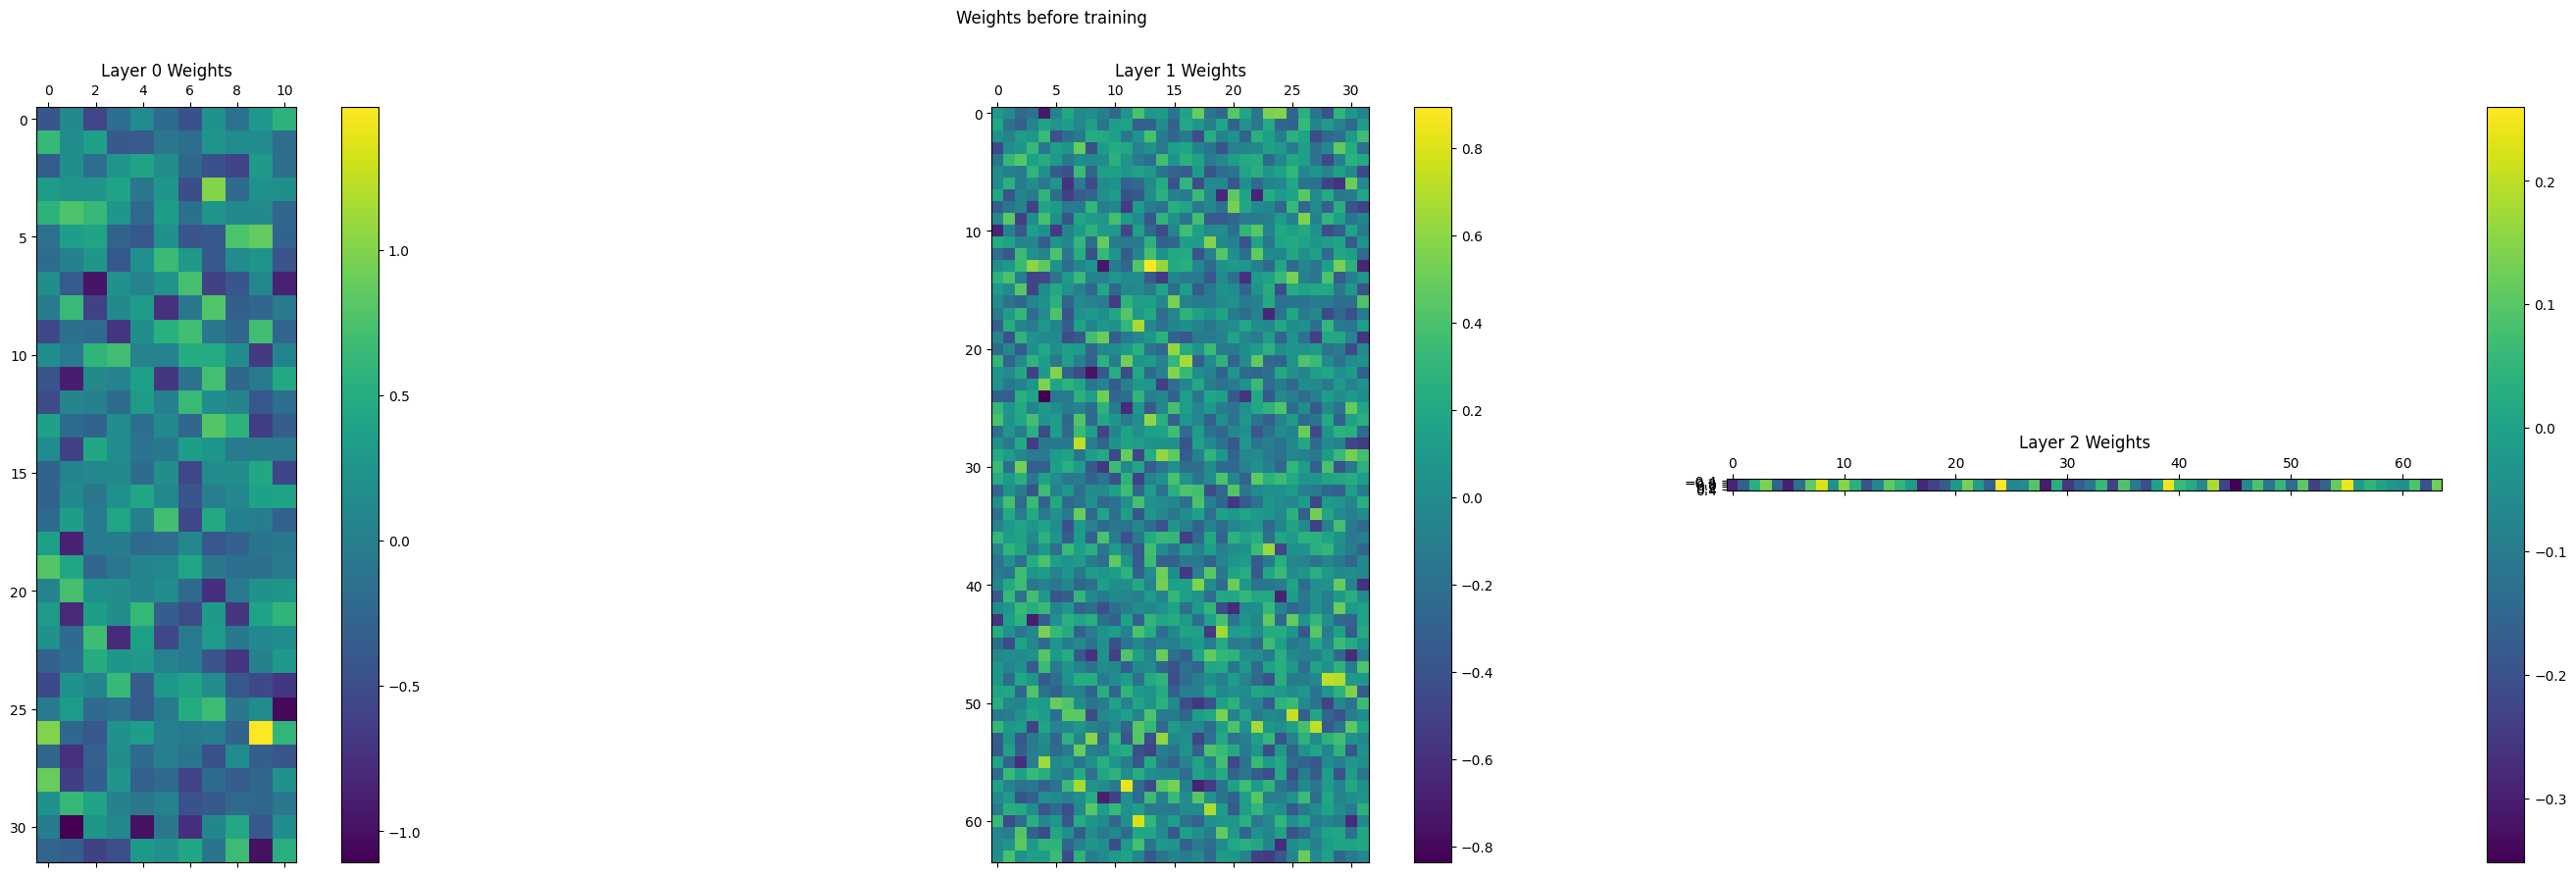

Training Progress:   0%|          | 0/64 [00:00<?, ?it/s]

Epoch 1/64 - {'mse_loss': 43.620738697892854}
Epoch 2/64 - {'mse_loss': 10.464391379909475}
Epoch 3/64 - {'mse_loss': 3.8054408450498847}
Epoch 4/64 - {'mse_loss': 2.3114593725176387}
Epoch 5/64 - {'mse_loss': 1.9320959828688304}
Epoch 6/64 - {'mse_loss': 1.8204732910348693}
Epoch 7/64 - {'mse_loss': 1.771632545174253}
Epoch 8/64 - {'mse_loss': 1.7351410456763876}
Epoch 9/64 - {'mse_loss': 1.701722416935523}
Epoch 10/64 - {'mse_loss': 1.6705568271778914}
Epoch 11/64 - {'mse_loss': 1.6837176979749042}
Epoch 12/64 - {'mse_loss': 1.6283151899163866}
Epoch 13/64 - {'mse_loss': 1.5946400421746458}
Epoch 14/64 - {'mse_loss': 1.5750537302644596}
Epoch 15/64 - {'mse_loss': 1.5718128238320583}
Epoch 16/64 - {'mse_loss': 1.5434644912410007}
Epoch 17/64 - {'mse_loss': 1.526791611217496}
Epoch 18/64 - {'mse_loss': 1.5160316774565201}
Epoch 19/64 - {'mse_loss': 1.4775320013387434}
Epoch 20/64 - {'mse_loss': 1.4672931692154072}
Epoch 21/64 - {'mse_loss': 1.4606189708774897}
Epoch 22/64 - {'mse_loss'

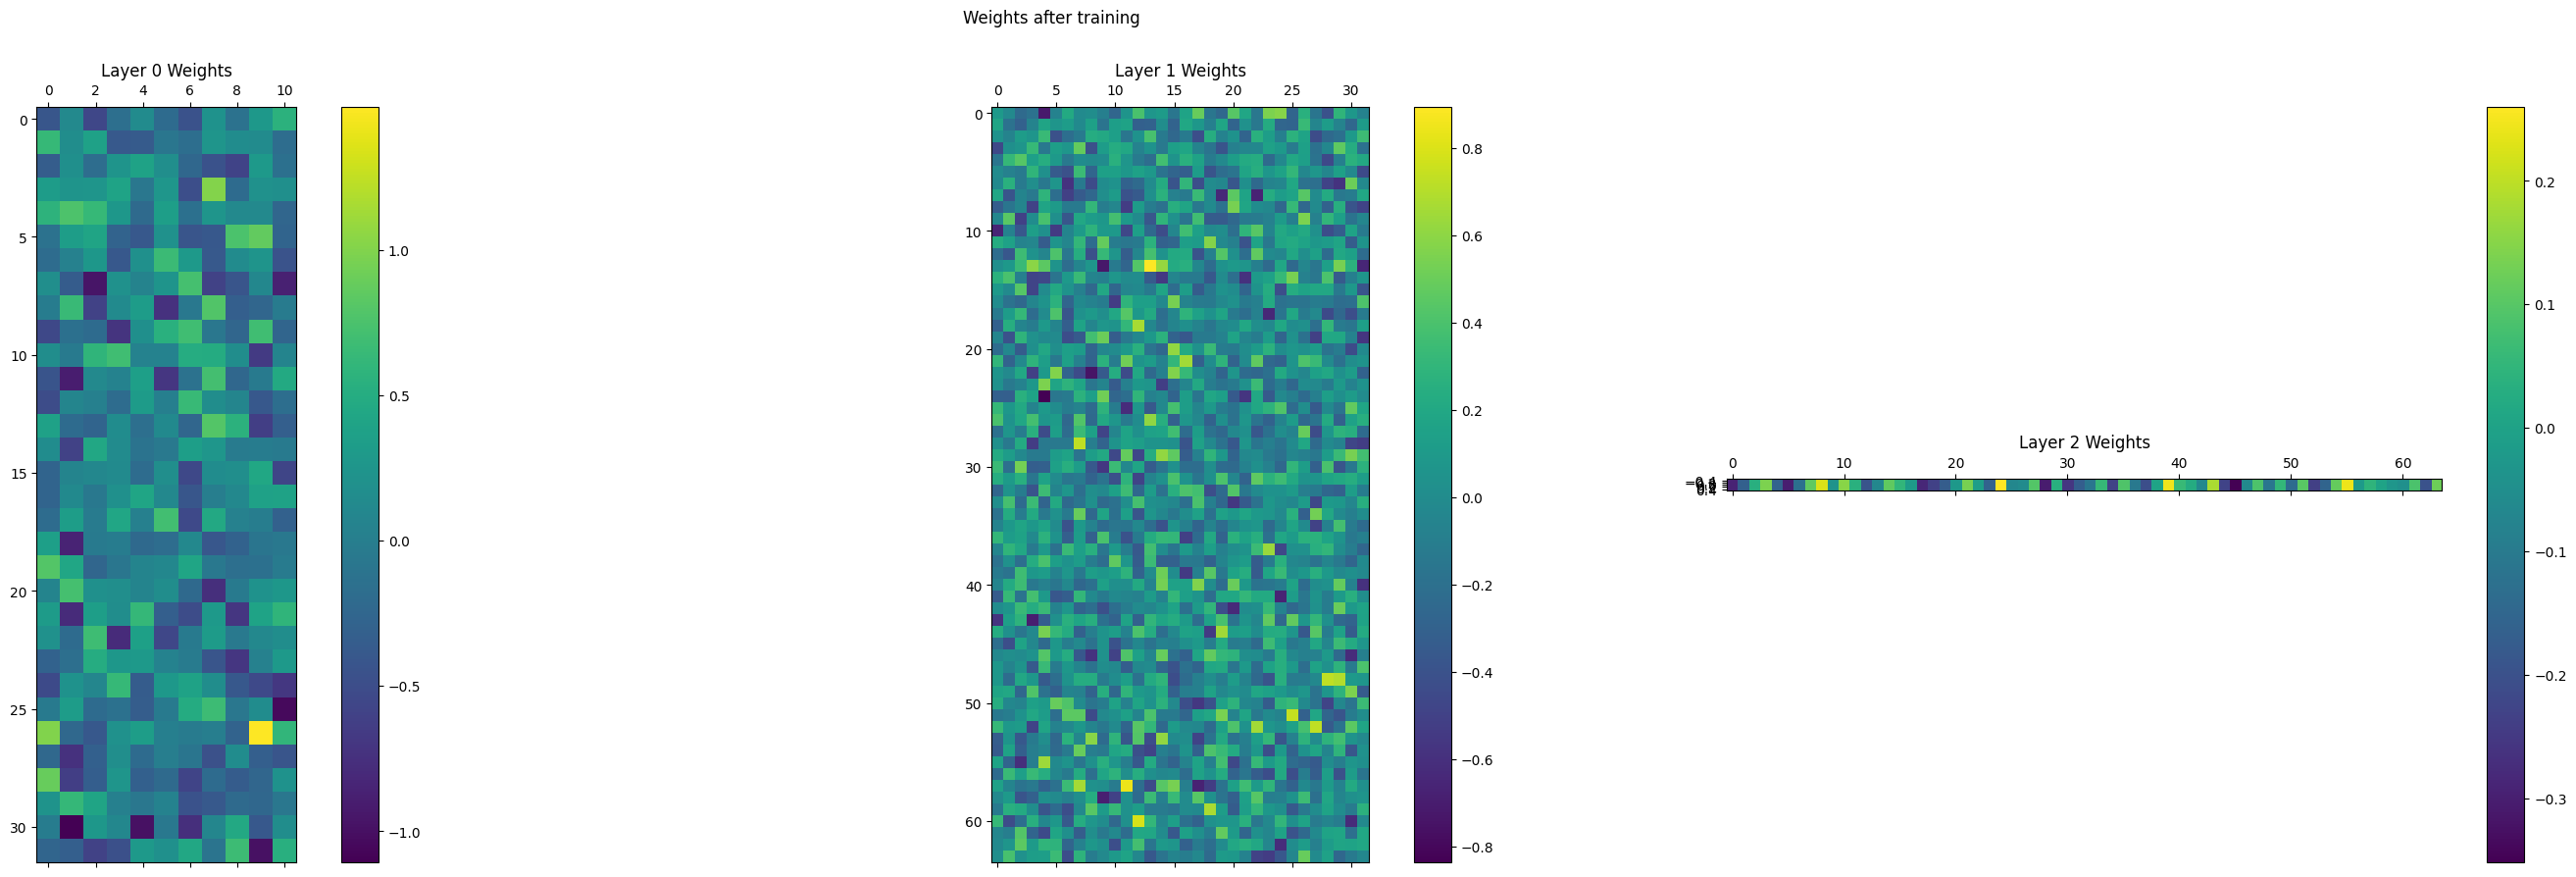

In [18]:
layer_sizes = [wine_X_train.shape[1], 32, 64, 1]
activations = [ReLU()] * (len(layer_sizes) - 2) + [Linear()]

mlp = MLP(layer_sizes, activations, learning_rate=0.001, epochs=64, batch_size=12)

visualize_weights(mlp, title="Weights before training")

metrics = mlp.fit(wine_X_train, wine_y_train, verbose=True)

visualize_weights(mlp, title="Weights after training")

In [19]:
wine_output = mlp.predict(wine_X_test.T) 
wine_output = np.round(wine_output)

print("Accuracy: ", accuracy(wine_y_test, wine_output.T))
print("MSE: ", mse_loss(wine_y_test, wine_output.T))
print("MAE: ", mae_loss(wine_y_test, wine_output.T))
print("RMSE: ", rmse_loss(wine_y_test, wine_output.T))
print("MAPE: ", mape_loss(wine_y_test, wine_output.T))
print("R2: ", r2_score(wine_y_test, wine_output.T))

Accuracy:  0.39692307692307693
MSE:  1.0161538461538462
MAE:  0.7315384615384616
RMSE:  1.0080445655594032
MAPE:  0.12922344322344323
R2:  -0.37588291094617277


## Hyperparameter Tuning

### Classification

### K-Nearest Neighbors

In [20]:
param_grid = {
    'k': [3, 5, 7, 10, 15, 50, 100, 200],
}

fixed_params = {
    'mode': 'classification'
}

knn_best_param, knn_best_score, knn_results = parallel_grid_search_knn(accuracy, mushroom_X_train, mushroom_y_train, mushroom_X_test, mushroom_y_test, param_grid, fixed_params)

KNN Grid Search:   0%|          | 0/8 [00:00<?, ?it/s]

In [21]:
print("Best parameter: ", knn_best_param)
print("Best score: ", knn_best_score)

Best parameter:  {'k': 3}
Best score:  0.9975384615384615


### Multi-Layer Perceptron

In [22]:
layer_sizes_options = [32, 64, 128]
max_layers = 3  #exploring up to 3 hidden layers

param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],  # List of learning rates to try
    'batch_size': [1, 8, 18],  # List of batch sizes to try
    'epochs': [32, 64],  # List of epochs to try
    'layer_sizes': [[mushroom_X_train.shape[1]] + list(combo) + [1] for num_layers in range(2, max_layers + 1) for combo in product(layer_sizes_options, repeat=num_layers)]
}

fixed_params = {
    'final_activation': Sigmoid(),
}

best_param, best_score, results = parallel_grid_search_mlp(accuracy, mushroom_X_train, mushroom_y_train, mushroom_X_test, mushroom_y_test, param_grid, fixed_params)

MLP Grid Search:   0%|          | 0/648 [00:00<?, ?it/s]

Training Progress:   0%|          | 0/64 [00:00<?, ?it/s]


In [23]:
print("Best parameter: ", best_param)
print("Best score: ", best_score)

Best parameter:  {'learning_rate': 0.1, 'batch_size': 1, 'epochs': 64, 'layer_sizes': [22, 64, 64, 64, 1], 'activation_objects': [<ai_nn_project.utils.activations.ReLU object at 0x7fa75ab61d80>, <ai_nn_project.utils.activations.ReLU object at 0x7fa75ab61a80>, <ai_nn_project.utils.activations.ReLU object at 0x7fa75ac3e440>, <ai_nn_project.utils.activations.Sigmoid object at 0x7fa75ac3c5e0>]}
Best score:  0.9495384615384616


### Regression

### K-Nearest Neighbors

In [27]:
param_grid = {
    'k': [3, 5, 7, 10, 15, 50, 100, 200],
}

fixed_params = {
    'mode': 'regression'
}

knn_best_param_reg, knn_best_score_reg, knn_results_reg = parallel_grid_search_knn(accuracy, wine_X_train, wine_y_train, wine_X_test, wine_y_test, param_grid, fixed_params)

KNN Grid Search:   0%|          | 0/8 [00:00<?, ?it/s]

In [28]:
print("Best parameter: ", knn_best_param_reg)
print("Best score: ", knn_best_score_reg)

Best parameter:  {'k': 3}
Best score:  0.2823076923076923


### Multi-Layer Perceptron

In [29]:
layer_sizes_options = [32, 64, 128]
max_layers = 3  #exploring up to 3 hidden layers

param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],  # List of learning rates to try
    'batch_size': [1, 8, 16],  # List of batch sizes to try
    'epochs': [32, 64],  # List of epochs to try
    'layer_sizes': [[wine_X_train.shape[1]] + list(combo) + [1] for num_layers in range(2, max_layers + 1) for combo in product(layer_sizes_options, repeat=num_layers)]
}

fixed_params = {
    'final_activation': Linear(),
}

best_param_reg, best_score_reg, results_reg = parallel_grid_search_mlp(accuracy, wine_X_train, wine_y_train, wine_X_test, wine_y_test, param_grid, fixed_params)

MLP Grid Search:   0%|          | 0/648 [00:00<?, ?it/s]

Training Progress:   0%|          | 0/64 [00:00<?, ?it/s]


In [30]:
print("Best parameter: ", best_param_reg)
print("Best score: ", best_score_reg)

Best parameter:  {'learning_rate': 0.1, 'batch_size': 1, 'epochs': 64, 'layer_sizes': [11, 128, 64, 32, 1], 'activation_objects': [<ai_nn_project.utils.activations.ReLU object at 0x7fa71bb1e350>, <ai_nn_project.utils.activations.ReLU object at 0x7fa71bb1c460>, <ai_nn_project.utils.activations.ReLU object at 0x7fa71bd011b0>, <ai_nn_project.utils.activations.Linear object at 0x7fa71bd00400>]}
Best score:  0.5676923076923077


## Comparison with Other Models